In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

In [5]:
def plot_multiclass_pr_from_preds(y_test, y_pred, 
                        title="PR Curve", labels=None, figsize=(8, 6)):

    # structures
    precision = dict()
    recall = dict()

    n_classes = y_pred.shape[1]
    assert y_pred.shape[1] >= np.max(y_test)

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False)
    y_test_dummies_vals = y_test_dummies.values
    
    average_precision = average_precision_score(y_test_dummies_vals, y_pred, average=None)
    
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_dummies_vals[:, i], y_pred[:, i])
        # print(precision[i][-50:], recall[i][-50:])
        
    # pr for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0.5, 0.5], 'k--')
    ax.set_xlim([0.0, 1.05])
    ax.set_ylim([0.5, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(title)

    if labels:
        for i, label in zip(range(n_classes), labels):
            ax.plot(precision[i], recall[i], label=f'PR curve (AP = {average_precision[i]:.2f}) for {label}')
    else:
        for i in range(n_classes):
            ax.plot(precision[i], recall[i], label=f'PR curve (AP = {average_precision[i]:.2f}) for label {i}')
        
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

def plot_multiclass_roc_from_preds(y_test, y_pred,
                        title="ROC Curve", labels=None, figsize=(8, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    n_classes = 3#y_pred.shape[1]
    # assert y_pred.shape[1] >= np.max(y_test)
    
    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False)
    y_test_dummies_vals = y_test_dummies.values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies_vals[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    if labels:
        for i, label in zip(range(n_classes), labels):
            ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {label}')
    else:
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for label {i}')
        
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    # sns.despine()
    plt.show()


# Compute Metrics based on iScout

In [12]:
df_docs = pd.read_csv("/home/vs428/project/Moore_data/followup_impression_data/dev.csv")

In [13]:
df_docs = df_docs.drop("Unnamed: 0", axis=1)

In [18]:
with open("/home/vs428/Documents/Moore/iScout/final.txt") as f:
    x = f.read().splitlines()

In [20]:
iscout_pred = [int(z) for z in x]

In [24]:
df_docs.loc[iscout_pred, "iScout_pred"] = "FOLLOW_UP"

In [28]:
df_docs['iScout_pred'] = df_docs['iScout_pred'].fillna("NO_FOLLOWUP")

In [34]:
df_docs['label_simple'] = np.where((df_docs['label'] == "CONDITIONAL_FOLLOWUP") | (df_docs['label'] == "HARD_FOLLOWUP"), "FOLLOW_UP", "NO_FOLLOWUP")


In [36]:
df_docs

,text,label,iScout_pred,label_simple
0,IMPRESSION: 3.2 cm infrarenal abdominal aortic...,NO_FOLLOWUP,NO_FOLLOWUP,NO_FOLLOWUP
1,IMPRESSION: No evidence of pulmonary embolism...,NO_FOLLOWUP,NO_FOLLOWUP,NO_FOLLOWUP
2,IMPRESSION: No pulmonary embolism. Emphysema....,CONDITIONAL_FOLLOWUP,NO_FOLLOWUP,FOLLOW_UP
3,IMPRESSION: No acute traumatic injury in the c...,NO_FOLLOWUP,NO_FOLLOWUP,NO_FOLLOWUP
4,CTA CHEST (PE) W IV CONTRAST INDICATION: PE su...,NO_FOLLOWUP,NO_FOLLOWUP,NO_FOLLOWUP
...,...,...,...,...
133,IMPRESSION: No evidence of pulmonary embolism...,CONDITIONAL_FOLLOWUP,FOLLOW_UP,FOLLOW_UP
134,IMPRESSION: 1. No pulmonary embolism or aorti...,NO_FOLLOWUP,FOLLOW_UP,NO_FOLLOWUP
135,IMPRESSION: 1. No evidence of pulmonary embol...,CONDITIONAL_FOLLOWUP,FOLLOW_UP,FOLLOW_UP
136,Impression: No evidence of pulmonary embolism...,HARD_FOLLOWUP,FOLLOW_UP,FOLLOW_UP


Text(0, 0.5, 'True Follow-Up Label (from Ryan)')

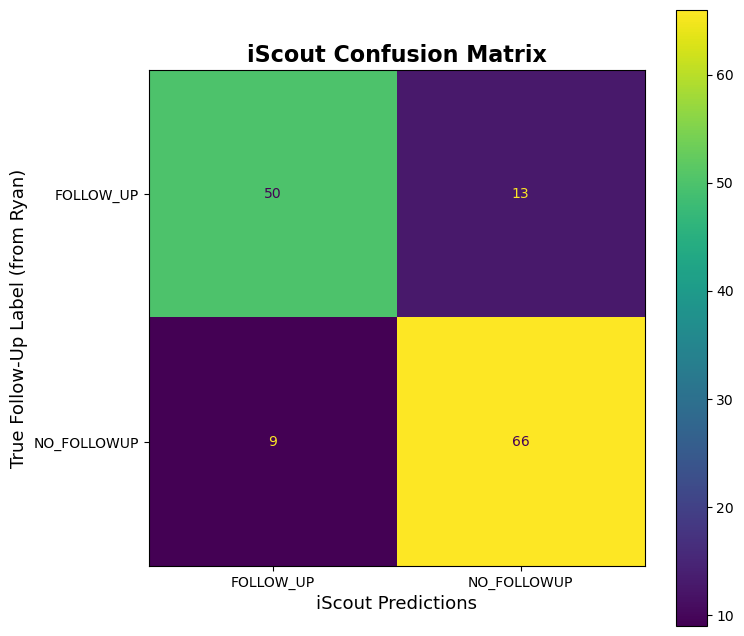

In [48]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title("iScout Confusion Matrix", fontsize=16, fontweight="bold")

ConfusionMatrixDisplay.from_predictions(df_docs['label_simple'], df_docs['iScout_pred'], ax=ax)
ax.set_xlabel("iScout Predictions", fontsize=13)
ax.set_ylabel("True Follow-Up Label (from Ryan)", fontsize=13)

In [40]:
# fig, [ax_roc, ax_det, ax_pr] = plt.subplots(1, 3, figsize=(20, 5))

# RocCurveDisplay.from_predictions(df_docs['label_simple'], df_docs['iScout_pred'], ax=ax_roc,pos_label="FOLLOW_UP" )# name=name)
# DetCurveDisplay.from_predictions(df_docs['label_simple'], df_docs['iScout_pred'], ax=ax_det, pos_label="FOLLOW_UP")#, name=name)
# PrecisionRecallDisplay.from_predictions(df_docs['label_simple'], df_docs['iScout_pred'], ax=ax_pr, pos_label="FOLLOW_UP")
